In [1]:
!pip install qiskit

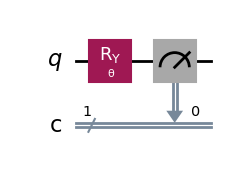

In [2]:
# Install Qiskit if not already installed
!pip install qiskit --quiet
!pip install qiskit-aer --quiet
!pip install pylatexenc --quiet

# Imports
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.circuit import Parameter
from qiskit.visualization import plot_histogram

# Step 1: Define a parameter for the angle
theta = Parameter('θ')  # classical feature encoded as rotation

# Step 2: Build a single-qubit circuit
qc = QuantumCircuit(1, 1)
qc.ry(theta, 0)    # Encode the classical feature as rotation
qc.measure(0, 0)   # Measure the qubit
qc.draw('mpl')      # Display the circuit

# To run the circuit, you would typically transpile it and run on a backend:
# backend = Aer.get_backend('qasm_simulator')
# transpiled_qc = transpile(qc, backend)
# job = backend.run(transpiled_qc, shots=1024)
# result = job.result()
# counts = result.get_counts()
# print(counts)

In [4]:
# Choose some sample data points
angle_values = [0, 3.14/4, 3.14/2, 3.14]  # radians

backend = Aer.get_backend('aer_simulator')

for val in angle_values:
    bound_qc = qc.assign_parameters({theta: val})
    job = backend.run(bound_qc, shots=1024)
    result = job.result().get_counts()
    print(f"θ = {val} rad -> Measurement counts: {result}")
    plot_histogram(result).show()

θ = 0 rad -> Measurement counts: {'0': 1024}
θ = 0.785 rad -> Measurement counts: {'1': 158, '0': 866}
θ = 1.57 rad -> Measurement counts: {'0': 516, '1': 508}
θ = 3.14 rad -> Measurement counts: {'1': 1024}


In [8]:
from qiskit.visualization import plot_bloch_vector
from qiskit.quantum_info import Statevector
import numpy as np

# Create a circuit without measurement for statevector simulation
qc_statevector = qc.remove_final_measurements(inplace=False)

for val in angle_values:
    bound_qc_statevector = qc_statevector.assign_parameters({theta: val})
    state = Statevector.from_instruction(bound_qc_statevector)
    plot_bloch_vector([state.data[0].real, state.data[0].imag, abs(state.data[1])**2])

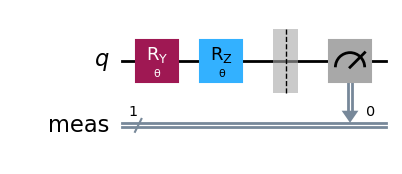

In [11]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter

theta = Parameter('θ')
qc = QuantumCircuit(1)
qc.ry(theta, 0)
qc.rz(theta, 0)
qc.measure_all()
qc.draw('mpl')


/tmp/ipython-input-2548240998.py:3: DeprecationWarning: The class ``qiskit.circuit.library.data_preparation._zz_feature_map.ZZFeatureMap`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the zz_feature_map function as a replacement. Note that this will no longer return a BlueprintCircuit, but just a plain QuantumCircuit.
  feature_map = ZZFeatureMap(feature_dimension=2, reps=2)


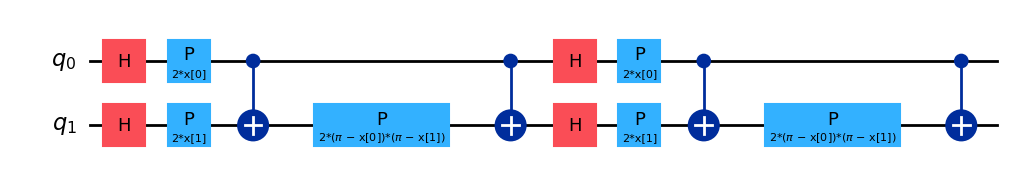

In [12]:
from qiskit.circuit.library import ZZFeatureMap

feature_map = ZZFeatureMap(feature_dimension=2, reps=2)
qc = feature_map.decompose()
qc.draw('mpl')
